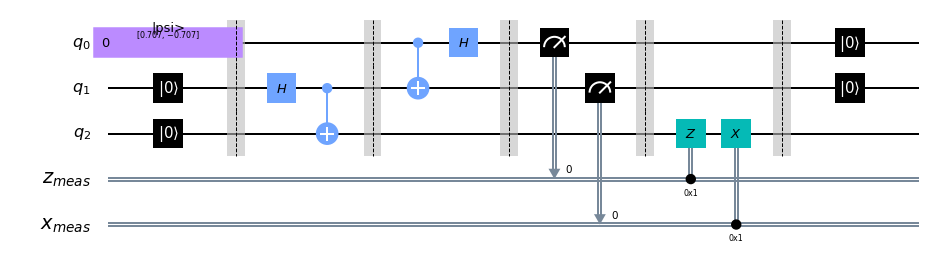

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
cregx = ClassicalRegister(1, 'x_{meas}')
cregz = ClassicalRegister(1, 'z_{meas}')
qreg = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qreg,cregz, cregx)
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
circuit.reset([1,2])
circuit.barrier()
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.barrier()
circuit.z(2).c_if(cregz, 1)
circuit.x(2).c_if(cregx, 1)
circuit.barrier()
circuit.reset([0,1])
circuit.draw(output='mpl')

In [22]:
from qiskit import Aer, assemble

backend = Aer.get_backend('statevector_simulator')
job = backend.run(assemble(circuit), backend_options=backend_options)
job.result().get_statevector()

array([ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
       -0.70710678+8.65956056e-17j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j])